<font size="6" color='red'>Fashion MNIST</font>
- 70k images
- 10 Categories
- Images are 28x28
- Can train a neural net!<br>
fashion mnist GitHub :  https://github.com/zalandoresearch/fashion-mnist

Code : https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%204%20-%20Lesson%202%20-%20Notebook.ipynb

In [1]:
import tensorflow as tf
print(tf.__version__)

1.12.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

# <font color='green'>Using a number label is a first step in avoiding bias</font>
Machine Learning Fairness : https://developers.google.com/machine-learning/fairness-overview/

In [4]:
import matplotlib.pyplot as plt

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

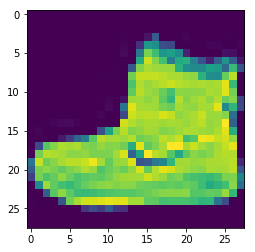

In [5]:
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [6]:
training_images = training_images / 255.
test_images = test_images / 255.

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
from keras.backend import tensorflow_backend as K
config=tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

Using TensorFlow backend.


In [9]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.4952 - acc: 0.8250
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.3715 - acc: 0.8669
Epoch 3/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.3348 - acc: 0.8796
Epoch 4/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.3125 - acc: 0.8865
Epoch 5/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2962 - acc: 0.8908


In [11]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 36us/step


[0.36145920217037203, 0.8722]

tweaking : 조정<br>
poke around : to search for something by moving things around, usually not in a very careful or organized way


## Callback

In [12]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.6):
            print('\nReached 60% accuracy so cancelling training!\n')
            self.model.stop_training=True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks=myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
59360/60000 [============================>.] - ETA: 0s - loss: 0.4744 - acc: 0.8316
Reached 60% accuracy so cancelling training!

60000/60000 [==============================] - 5s 81us/step - loss: 0.4736 - acc: 0.8316


# Week 2 Quiz - Guess
1. What’s the name of the dataset of Fashion images used in this week’s code?
>>  Fashion MNIST
2. What do the above mentioned Images look like?
>> 28x28 Greyscale
3. How many images are in the Fashion MNIST dataset?
>> 70,000
4. Why are there 10 output neurons?
>> There are 10 different labels
5. What does Relu do?
>> It only returns x if x is greater than zero
6. Why do you split data into training and test sets?
>> To test a network with previously unseen data
7. What method gets called when an epoch finishes?
>> on_epoch_end
8. What parameter to you set in your fit function to tell it to use callbacks?
>> callbacks=

# Exercise
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:

It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
If you add any additional variables, make sure you use the same names as the ones used in the class
I've started the code for you below -- how would you finish it?

In [13]:
# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
# YOUR CODE SHOULD START HERE

# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
    
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE

# Exercise Code

In [14]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > 0.99:
            print('\nReached 99% accuracy so cancelling training!\n')
            self.model.stop_training=True  
            
mnist=tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.

callbacks=myCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2005 - acc: 0.9412
Epoch 2/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.0789 - acc: 0.9770
Epoch 3/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.0518 - acc: 0.9842
Epoch 4/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.0370 - acc: 0.9878
Epoch 5/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0278 - acc: 0.9911
Reached 99% accuracy so cancelling training!

60000/60000 [==============================] - 5s 75us/step - loss: 0.0279 - acc: 0.9911


In [15]:
classifications = model.predict(test_images)
print(classifications[0])

[6.8256783e-13 6.0847030e-09 9.9988389e-01 3.1046560e-14 2.5340771e-10
 9.2644792e-10 1.1614462e-04 3.8075709e-17 3.8484629e-11 1.0304899e-17]


In [16]:
print(test_labels[0])

9


In [17]:
classifications.shape

(10000, 10)

more Quiz link : https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%204%20-%20Lesson%202%20-%20Notebook.ipynb

# Question 1. Increase to 1024 Neurons -- What's the impact?
   1. Training takes longer, but is more accurate
   2. Training takes longer, but no impact on accuracy
   - Training takes the same time, but is more accurate
   
tf.keras.layers.Dense(512, activation='relu') => tf.keras.layers.Dense(1024, activation=tf.nn.relu)<br>

The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!


# Exercise 5:
Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

# Exercise 7:
Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [18]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.12.0
Epoch 1/5
60000/60000 [==============================] - 5s 77us/step - loss: 12.9234
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 12.0042
Epoch 3/5
60000/60000 [==============================] - 4s 73us/step - loss: 11.4943
Epoch 4/5
60000/60000 [==============================] - 4s 73us/step - loss: 11.3457
Epoch 5/5
10000/10000 [==============================] - 0s 39us/step
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
7
